In [175]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score,plot_confusion_matrix, classification_report

In [176]:
url = "https://raw.githubusercontent.com/codebasics/py/master/ML/14_naive_bayes/spam.csv"
df = pd.read_csv(url)
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# EXPLORATORY DATA ANALYSIS

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [178]:
df.groupby("Category").describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [179]:
df['spam'] = df['Category'].apply(lambda x:1 if x =='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


Text(0.5, 1.0, 'Count by Category')

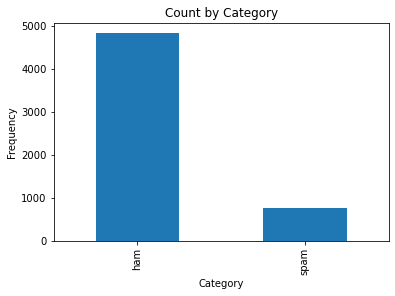

In [180]:
df.groupby('Category')['Message'].count().plot(kind="bar")
plt.ylabel("Frequency")
plt.title("Count by Category")

In [181]:
df.drop(['Category'],axis=1, inplace=True)

In [157]:
X_train,X_test,y_train,y_test = train_test_split(df.Message, df.spam, random_state=42, test_size = 0.2)

### Count Vectorizer 

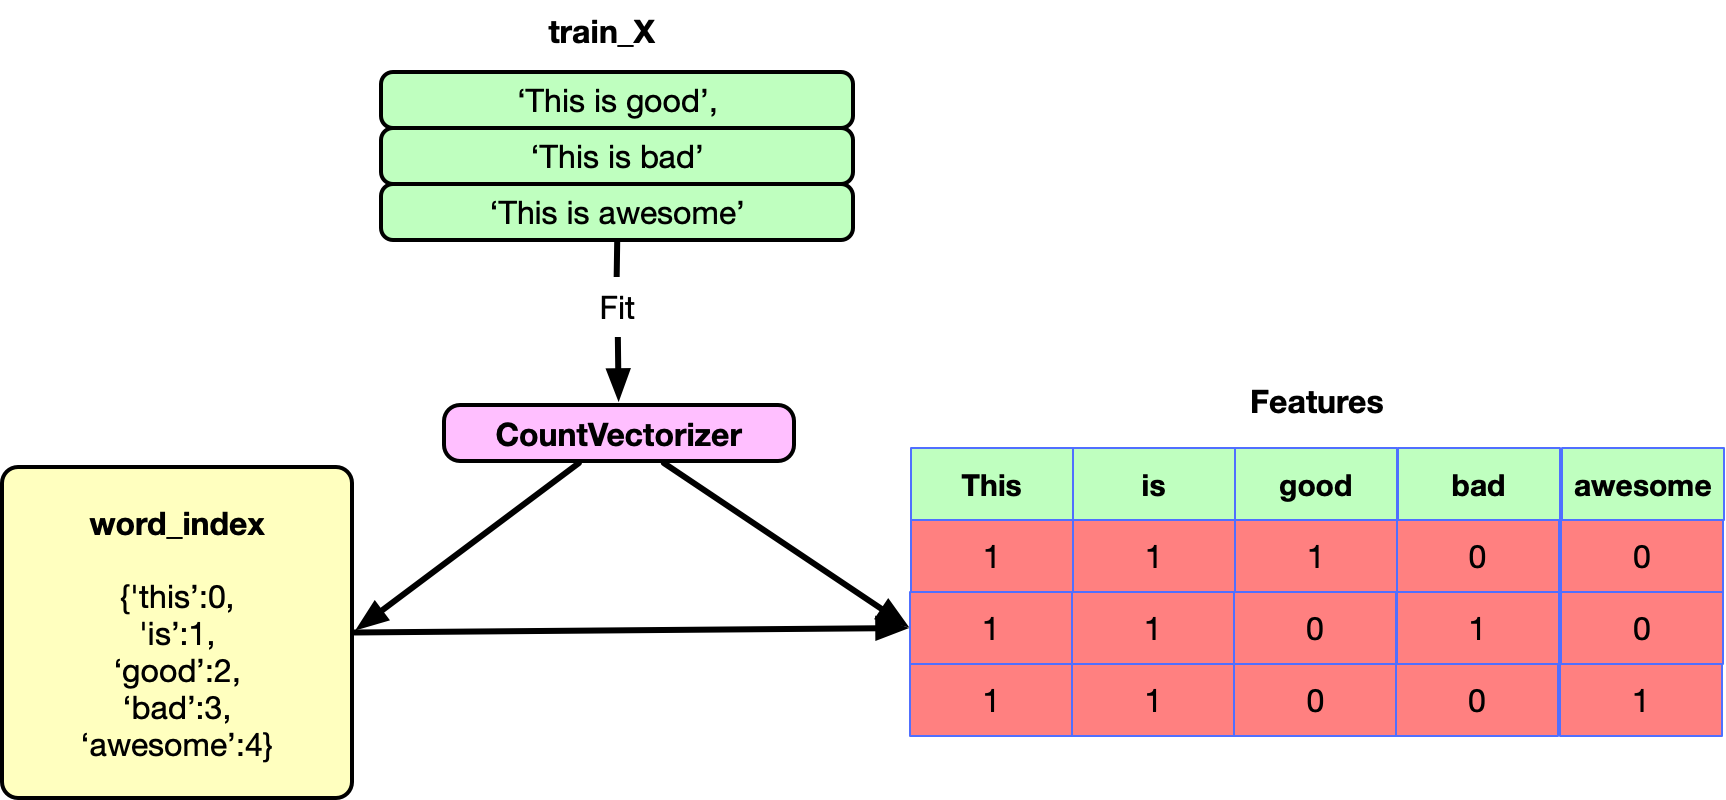

In [158]:
vectorizer = CountVectorizer()
X_train_vector = vectorizer.fit_transform(X_train)
X_train_vector.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [159]:
vectorizer.inverse_transform(X_train_vector[0])

[array(['reply', 'to', 'win', '100', 'weekly', 'where', 'will', 'the',
        '2006', 'fifa', 'world', 'cup', 'be', 'held', 'send', 'stop',
        '87239', 'end', 'service'], dtype='<U34')]

In [160]:
X_train.iloc[0]

'Reply to win £100 weekly! Where will the 2006 FIFA World Cup be held? Send STOP to 87239 to end service'

# MODEL FITTING

# Without Pipeline

In [162]:
model = MultinomialNB()
model.fit(X_train_vector,y_train)

MultinomialNB()

# PREDICTION

In [163]:
messages = [
    'Hey ali, can we get together to play football game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
messages_vector = vectorizer.transform(messages)
model.predict(messages_vector)

array([0, 1], dtype=int64)

So above prediction says that first message of messages is ham and second is Spam

# EVALUATION

In [164]:
X_test_vector = vectorizer.transform(X_test)
model.score(X_test_vector, y_test)

0.9919282511210762

# MODEL FITTING

## WITH SKLEARN PIPELINE

In [165]:
m = Pipeline([('vectoriser', CountVectorizer()),
                ('nb',MultinomialNB())
            ])

In [166]:
m.fit(X_train,y_train)

Pipeline(steps=[('vectoriser', CountVectorizer()), ('nb', MultinomialNB())])

In [167]:
m.predict(messages)

array([0, 1], dtype=int64)

### Confusion Matrix

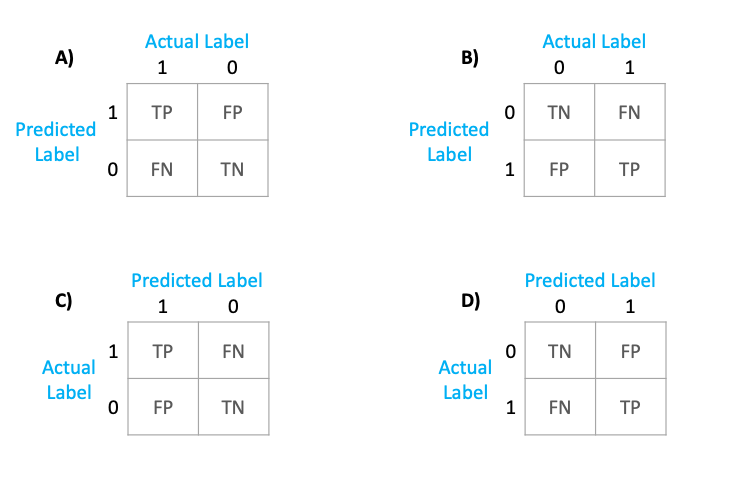

In [168]:
cm = confusion_matrix(y_test, m.predict(X_test))
print(cm)

[[966   0]
 [  9 140]]


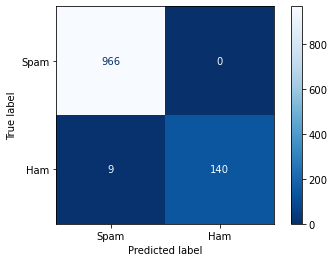

In [172]:
plot_confusion_matrix(m, X_test, y_test, display_labels=['Spam','Ham'], cmap = plt.cm.Blues_r)

In [173]:
print(classification_report(y_test, m.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       966
           1       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



In [174]:
accuracy_score(y_test, m.predict(X_test))

0.9919282511210762